In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/bhara-zstch1566/Machine Learning/Decission Tree/play_tennis.csv")
df = df.drop(columns="day")

In [3]:
df["play"] = df["play"].map({"No":0,"Yes":1})

In [4]:
df["wind"] = df["wind"].map({'Weak':0, 'Strong':1})

In [5]:
df["humidity"] = df["humidity"].map({'High':1, 'Normal':0})

In [6]:
df["temp"] = df["temp"].map({'Hot':1, 'Mild':2, 'Cool':3})

In [7]:
df["outlook"] = df["outlook"].map({"Rain":1,"Overcast":2,"Sunny":3})

In [8]:
df

,outlook,temp,humidity,wind,play
0,3,1,1,0,0
1,3,1,1,1,0
2,2,1,1,0,1
3,1,2,1,0,1
4,1,3,0,0,1
5,1,3,0,1,0
6,2,3,0,1,1
7,3,2,1,0,0
8,3,3,0,0,1
9,1,2,0,0,1


In [9]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [10]:
X = X.to_numpy()
Y = Y.to_numpy()

In [11]:
X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y)

In [12]:
X

tensor([[3., 1., 1., 0.],
        [3., 1., 1., 1.],
        [2., 1., 1., 0.],
        [1., 2., 1., 0.],
        [1., 3., 0., 0.],
        [1., 3., 0., 1.],
        [2., 3., 0., 1.],
        [3., 2., 1., 0.],
        [3., 3., 0., 0.],
        [1., 2., 0., 0.],
        [3., 2., 0., 1.],
        [2., 2., 1., 1.],
        [2., 1., 0., 0.],
        [1., 2., 1., 1.]])

In [13]:
def entropy(y):
    classes, counts = torch.unique(y, return_counts=True)
    probs = counts.float() / counts.sum()
    return -torch.sum(probs * torch.log2(probs))


In [14]:
Y

tensor([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [15]:
def information_gain(X, y, feature_index):
    parent_entropy = entropy(y)
    values = torch.unique(X[:, feature_index])

    weighted_entropy = 0.0
    for v in values:
        mask = X[:, feature_index] == v
        y_subset = y[mask]
        weighted_entropy += (len(y_subset) / len(y)) * entropy(y_subset)

    return parent_entropy - weighted_entropy


In [16]:
def best_split(X, y):
    gains = []
    for i in range(X.shape[1]):
        gains.append(information_gain(X, y, i))
    return torch.argmax(torch.tensor(gains)).item()


In [17]:
class Node:
    def __init__(self, feature=None, children=None, value=None):
        self.feature = feature      # feature index
        self.children = children    # dict {feature_value: Node}
        self.value = value          # class at leaf

In [18]:
def build_tree(X, y):
    if len(torch.unique(y)) == 1:
        return Node(value=y[0].item())

    if X.shape[1] == 0:

        majority = torch.mode(y).values.item()
        return Node(value=majority)

    feature = best_split(X, y)
    node = Node(feature=feature, children={})

    for v in torch.unique(X[:, feature]):
        mask = X[:, feature] == v
        node.children[v.item()] = build_tree(X[mask], y[mask])

    return node

In [19]:
tree = build_tree(X, Y)

In [20]:
def predict(node, x):
    if node.value is not None:
        return node.value

    feature_value = x[node.feature].item()
    return predict(node.children[feature_value], x)


In [21]:
sample = torch.tensor([1, 2, 1, 1])  
print(predict(tree, sample))  

0


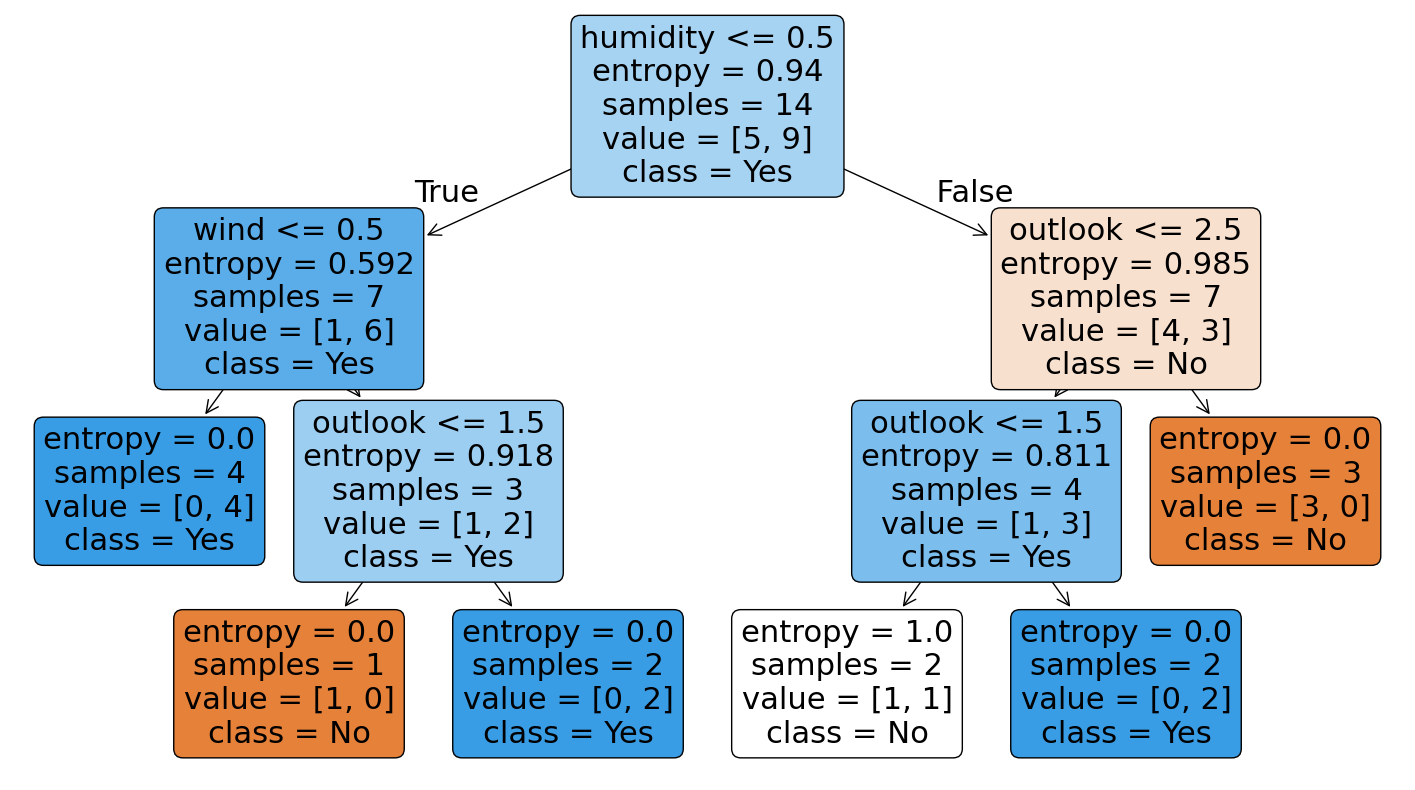

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# -------------------------------
# 1. Load dataset
# -------------------------------
df = pd.read_csv("/Users/bhara-zstch1566/Machine Learning/Decission Tree/play_tennis.csv")
df = df.drop(columns="day")

# -------------------------------
# 2. Encode categorical features
# -------------------------------
df["play"] = df["play"].map({"No": 0, "Yes": 1})
df["wind"] = df["wind"].map({"Weak": 0, "Strong": 1})
df["humidity"] = df["humidity"].map({"High": 1, "Normal": 0})
df["temp"] = df["temp"].map({"Hot": 1, "Mild": 2, "Cool": 3})
df["outlook"] = df["outlook"].map({"Rain": 1, "Overcast": 2, "Sunny": 3})

# -------------------------------
# 3. Split features and target
# -------------------------------
X = df.drop(columns="play")
y = df["play"]

# -------------------------------
# 4. Train Decision Tree (ID3-style)
# -------------------------------
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3
)
model.fit(X, y)

# -------------------------------
# 5. Plot Decision Tree
# -------------------------------
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.show()
